<a href="https://colab.research.google.com/github/arifwidiasan/Aksara-Jawa-Random_Forest/blob/master/Klasifikasi_Huruf_Aksara_Jawa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training Data**

In [ ]:
import glob
import cv2
import os
import numpy as np

path = "drive/MyDrive/dataset-aksara_jawa/"
labels=[name for name in os.listdir(path)]

dataset=[]
label_dataset=[]
huruf_aksara=["ha","na","ca","ra","ka",
            "da","ta","sa","wa","la",
            "pa","dha","ja","ya","nya",
            "ma","ga","ba","tha","nga"]
for label in labels:
    print(label)
    for img in glob.glob(path+label+"/*.*"):
        label_dataset.append(huruf_aksara.index(label))
        citra = cv2.imread(img)
        dataset.append(citra)
print(label_dataset)

ma
ja
dha
ha
ba
ca
ka
la
ga
da
ra
nga
pa
sa
tha
nya
ta
wa
ya
na
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
import math
my_list = []

for file in dataset:
    ab = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
    b = cv2.cvtColor(ab, cv2.COLOR_RGB2GRAY)
    ret, c = cv2.threshold(b,127,255,cv2.THRESH_BINARY)
    h,w = c.shape

    x1=w-1
    y1=h-1
    x2=y2=0

    for y in range(0,h-1):
      for x in range(0,w-1):
        if c[y,x]==0:
          if x>=x2:
            x2=x
          elif y>=y2:
            y2=y

    for y in range(h-1,0,-1):
      for x in range(w-1,0,-1):
        if c[y,x]==0:
          if x<=x1:
            x1=x
          elif y<=y1:
            y1=y

    x2+=1
    if (y2-y1)%2 == 1:
      y2+=1
    if (x2-x1)%2 == 1:
      x2+=1 

    img_cropped = c[y1:y2,x1:x2]
    hc,wc = img_cropped.shape
    img2 = img_cropped
    #membuat border agar gambar tetap 1:1

    s = abs(hc-wc)

    if wc>hc:
      img2 = cv2.copyMakeBorder(img_cropped,round(s/2),round(s/2),0,0,cv2.BORDER_CONSTANT,value=255)
    elif wc<hc:
      img2 = cv2.copyMakeBorder(img_cropped,0,0,round(s/2),round(s/2),cv2.BORDER_CONSTANT,value=255)

    #dilate
    #max_unit = max(hc,wc)
    #dilate_by = math.ceil(max_unit/30)+1
    #kernel_dilate = np.ones((dilate_by, dilate_by), 'uint8')
    #img2 = cv2.dilate(img2,kernel_dilate,iterations=1)

    img2 = cv2.resize(img2,(32,32), interpolation=cv2.INTER_AREA)
    #plt.imshow(img2,cmap="gray")
    my_list.append(img2)

In [ ]:
tes = np.asanyarray(my_list)
tes.shape

(500, 32, 32)

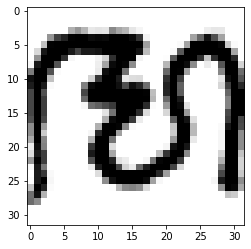

In [ ]:
from matplotlib import pyplot as plt 
plt.imshow(my_list[10],cmap="gray")

In [ ]:
from skimage.feature import hog
featureHog=[]
for image in my_list:
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True)
    featureHog.append(hog_image)

500


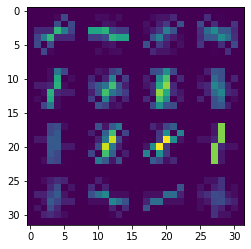

In [ ]:
print(len(featureHog))
plt.imshow(featureHog[10])

In [ ]:
arrayBaru=np.asarray(featureHog)
print(arrayBaru.shape)

(500, 32, 32)


In [ ]:
arrayBaru2=np.zeros((arrayBaru.shape[0],arrayBaru.shape[1]*arrayBaru.shape[2]))
for idx,item in enumerate(arrayBaru):
    arrayBaru2[idx,]=np.reshape(item,(1024))

In [ ]:
print(arrayBaru2.shape)

(500, 1024)


In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(arrayBaru2, label_dataset, 
                                                        stratify=label_dataset ,test_size = 0.2, random_state = 42)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n decision trees
rf = RandomForestClassifier(n_estimators = 1800, criterion="entropy", random_state=42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(criterion='entropy', n_estimators=1800, random_state=42)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [ ]:
score=rf.score(test_features,test_labels)
print(score)

0.92


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels,predictions,target_names=huruf_aksara))

              precision    recall  f1-score   support

          ha       1.00      1.00      1.00         5
          na       0.83      1.00      0.91         5
          ca       1.00      0.60      0.75         5
          ra       1.00      1.00      1.00         5
          ka       0.83      1.00      0.91         5
          da       1.00      0.80      0.89         5
          ta       0.83      1.00      0.91         5
          sa       1.00      1.00      1.00         5
          wa       0.83      1.00      0.91         5
          la       1.00      1.00      1.00         5
          pa       1.00      1.00      1.00         5
         dha       0.60      0.60      0.60         5
          ja       1.00      1.00      1.00         5
          ya       1.00      1.00      1.00         5
         nya       1.00      0.80      0.89         5
          ma       0.83      1.00      0.91         5
          ga       1.00      1.00      1.00         5
          ba       0.83    

# **TEST KLASIFIKASI HURUF AKSARA JAWA**

In [ ]:
# Mengupload semua citra yang diperlukan
from google.colab import files
uploaded = files.upload()

Saving ba.jpg to ba.jpg


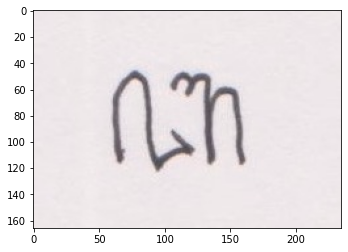

In [ ]:
tes_aksara = cv2.imread("ba.jpg")
plt.imshow(tes_aksara)

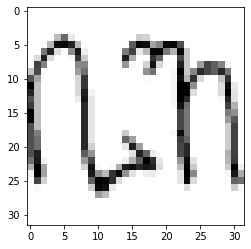

In [ ]:
ab = cv2.cvtColor(tes_aksara, cv2.COLOR_BGR2RGB)
b = cv2.cvtColor(ab, cv2.COLOR_RGB2GRAY)
ret, c = cv2.threshold(b,127,255,cv2.THRESH_BINARY)
h,w = c.shape

x1=w-1
y1=h-1
x2=y2=0

for y in range(0,h-1):
      for x in range(0,w-1):
        if c[y,x]==0:
          if x>=x2:
            x2=x
          elif y>=y2:
            y2=y

for y in range(h-1,0,-1):
      for x in range(w-1,0,-1):
        if c[y,x]==0:
          if x<=x1:
            x1=x
          elif y<=y1:
            y1=y

x2+=1
if (y2-y1)%2 == 1:
    y2+=1
if (x2-x1)%2 == 1:
    x2+=1 

img_cropped = c[y1:y2,x1:x2]
hc,wc = img_cropped.shape
img2 = img_cropped
#membuat border agar gambar tetap 1:1

s = abs(hc-wc)

if wc>hc:
  img2 = cv2.copyMakeBorder(img_cropped,round(s/2),round(s/2),0,0,cv2.BORDER_CONSTANT,value=255)
elif wc<hc:
  img2 = cv2.copyMakeBorder(img_cropped,0,0,round(s/2),round(s/2),cv2.BORDER_CONSTANT,value=255)

#dilate
#max_unit = max(hc,wc)
#dilate_by = math.ceil(max_unit/30)+1
#kernel_dilate = np.ones((dilate_by, dilate_by), 'uint8')
#img2 = cv2.dilate(img2,kernel_dilate,iterations=1)
img2 = cv2.resize(img2,(32,32), interpolation=cv2.INTER_AREA)
plt.imshow(img2,cmap="gray")

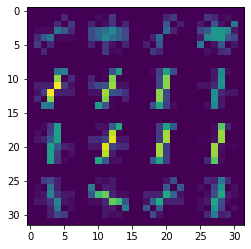

In [ ]:
tes_featureHog=[]
fd, hog_image = hog(img2, orientations=8, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True)
tes_featureHog.append(hog_image)
plt.imshow(featureHog[0])

In [ ]:
tes_arrayBaru=np.asarray(tes_featureHog)
print(tes_arrayBaru.shape)

(1, 32, 32)


In [ ]:
tes_arrayBaru2=np.zeros((tes_arrayBaru.shape[0],tes_arrayBaru.shape[1]*tes_arrayBaru.shape[2]))
for idx,item in enumerate(tes_arrayBaru):
    tes_arrayBaru2[idx,]=np.reshape(item,(1024))
print(tes_arrayBaru2.shape)

(1, 1024)


In [ ]:
# Use the forest's predict method on the test data
predictions2 = rf.predict(tes_arrayBaru2)
print("Hasil prediksi huruf aksara adalah = "+huruf_aksara[predictions2[0]])

Hasil prediksi huruf aksara adalah = ba
